In [ ]:
# Imports

import requests
from bs4 import BeautifulSoup
import pandas as pd
# from bokeh.io import output_notebook
# output_notebook()
# bokeh_width, bokeh_height = 500,400
from typing import List

In [ ]:
# Clean the data
def dataCleanse(spacey_arr: List[str]):
  ret_str = []
  for k in spacey_arr:
    if k != '':
      ret_str.append(k)
  return ret_str

In [ ]:
PAGES = 10
prof_info = []

for p in range(PAGES):
  URL = "https://www.seas.harvard.edu/faculty?sort_by=field_last_name&page=%2C" + str(p)
  page = requests.get(URL)

  soup = BeautifulSoup(page.content, 'html.parser')
  results = soup.find_all(class_="views-row")

  for i in range(1, len(results)):
    items = results[i].text.strip().split("\n")
    prof_info.append(dataCleanse(items))
  


In [ ]:
# Cool Visualization of Prof Breakdown
roles = ["Non-Tenured Faculty", "Assoc. Professor", "Ass Professor", "Professor", "Administration"]
titles = ["Preceptor", "Fellow", "Scholar", "Lecturer", "Associate in", "Associate Professor", "Assistant Professor", "Professor", "Director"]
ticks = [0 for _ in range(len(roles))]

for prof in prof_info:
  for t in range(len(titles)):
    if titles[t] in prof[1]:
      if t < 5:
        ticks[0] += 1
      else:
        ticks[t-4] += 1
      break

print(ticks)

[39, 6, 19, 107, 9]


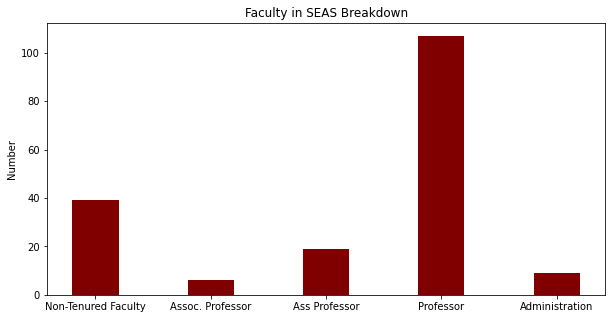

In [ ]:
# Job Breakdown

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(roles, ticks, color ='maroon', width = 0.4)
 
plt.ylabel("Number")
plt.title("Faculty in SEAS Breakdown")
plt.show()
